In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading Dataset

In [3]:
data = pd.read_csv("./IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### 2. Understanding the Dataset

In [5]:
len(data)

50000

In [6]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

-> No null Values

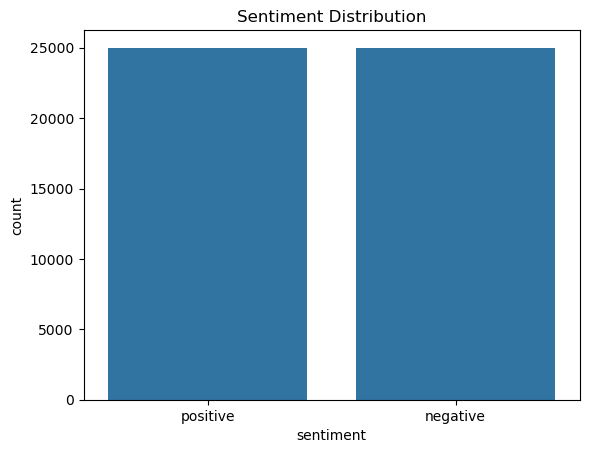

In [8]:
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

In [9]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

-> This is a balanced Dataset

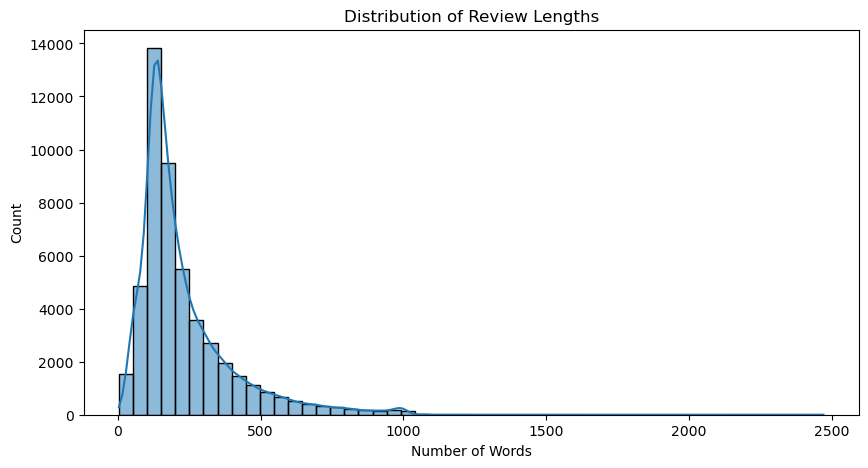

In [11]:
data['review_length'] = data['review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(data, x='review_length', bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.show()


### 3. Text Preprocessing

In [13]:
data["review"] = data["review"].str.lower()

In [14]:
from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

data['review'] = data['review'].apply(remove_html)

C:\Users\HP\AppData\Local\Temp\ipykernel_7852\3145398010.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [15]:
import re

def remove_punct_num(text):
    return re.sub(r'[^a-z\s]', '', text)

data['review'] = data['review'].apply(remove_punct_num)


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stop_words = set(stopwords.words('english'))

In [18]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)
data['review'] = data['review'].apply(remove_stopwords)

In [19]:
data.head()

,review,sentiment,review_length
0,one reviewers mentioned watching oz episode yo...,positive,307
1,wonderful little production filming technique ...,positive,162
2,thought wonderful way spend time hot summer we...,positive,166
3,basically theres family little boy jake thinks...,negative,138
4,petter matteis love time money visually stunni...,positive,230


In [20]:
data['tokens'] = data['review'].apply(lambda x: x.split())

In [21]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
lemmatizer = WordNetLemmatizer()

In [24]:
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

data['tokens'] = data['tokens'].apply(lemmatize_tokens)

In [25]:
data.head()

,review,sentiment,review_length,tokens
0,one reviewers mentioned watching oz episode yo...,positive,307,"[one, reviewer, mentioned, watching, oz, episo..."
1,wonderful little production filming technique ...,positive,162,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,166,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,negative,138,"[basically, there, family, little, boy, jake, ..."
4,petter matteis love time money visually stunni...,positive,230,"[petter, matteis, love, time, money, visually,..."


### 4. Feature Extraction

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

data['clean_text'] = data['tokens'].apply(lambda x: ' '.join(x))
tfidf = TfidfVectorizer(max_features=5000) 
X = tfidf.fit_transform(data['clean_text'])
y = data['sentiment'].map({'positive': 1, 'negative': 0})


### 5. Model Training

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state=42
)

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### 6. Model Evaluation

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8847

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[4318  643]
 [ 510 4529]]


In [38]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

print("NB Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

NB Accuracy: 0.8489
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [39]:
import joblib
joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']

In [40]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [42]:
log_reg = joblib.load('logistic_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

sample = ["ohhhh"]
X_sample = tfidf_vectorizer.transform(sample)
prediction = log_reg.predict(X_sample)

print("Predicted Sentiment:", prediction[0])


Predicted Sentiment: 0
